In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

In [3]:
training_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
training_df['train_test'] = 1
test_df['train_test'] = 0
test_df['Transported'] = np.NAN
df = pd.concat([training_df, test_df])

/tmp/ipykernel_6381/2575943161.py:6: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df = pd.concat([training_df, test_df])


In [5]:
print(training_df.info())
print(test_df.info())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  train_test    8693 non-null   int64  
dtypes: bool(1), float64(6), int64(1), object(7)
memory usage: 959.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data colum

In [6]:
def convert_to_custom_value(value):
    if pd.isna(value):
        return None
    elif value:
        return 1
    else:
        return 0
    
def array_to_int(array, value):
    if value is None:
        return 0
    else:
        return array.tolist().index(value) + 1

In [7]:
destination_array = df['Destination'].unique()
home_planet_array = df['HomePlanet'].unique()
df['Group'], df['In_group_id'] = df['PassengerId'].apply(lambda x: x.split('_')[0]), df['PassengerId'].apply(lambda x: x.split('_')[1])
df['CryoSleep'] = df['CryoSleep'].apply(convert_to_custom_value)
df[['Deck', 'DeckNumber', 'Side']] = df['Cabin'].str.split('/', expand=True)
df['Destination'] = df['Destination'].apply(lambda x: array_to_int(destination_array, x))
df['VIP'] = df['VIP'].apply(convert_to_custom_value)
df['Surname'] = df['Name'].str.split(pat=' ').str[1]
df['HomePlanet'] = df['HomePlanet'].apply(lambda x: array_to_int(home_planet_array, x))
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,train_test,Group,In_group_id,Deck,DeckNumber,Side,Surname
0,0001_01,1,0.0,B/0/P,1,39.0,0.0,0.0,0.0,0.0,...,0.0,Maham Ofracculy,0.0,1,0001,01,B,0,P,Ofracculy
1,0002_01,2,0.0,F/0/S,1,24.0,0.0,109.0,9.0,25.0,...,44.0,Juanna Vines,1.0,1,0002,01,F,0,S,Vines
2,0003_01,1,0.0,A/0/S,1,58.0,1.0,43.0,3576.0,0.0,...,49.0,Altark Susent,0.0,1,0003,01,A,0,S,Susent
3,0003_02,1,0.0,A/0/S,1,33.0,0.0,0.0,1283.0,371.0,...,193.0,Solam Susent,0.0,1,0003,02,A,0,S,Susent
4,0004_01,2,0.0,F/1/S,1,16.0,0.0,303.0,70.0,151.0,...,2.0,Willy Santantines,1.0,1,0004,01,F,1,S,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,2,1.0,G/1496/S,1,34.0,0.0,0.0,0.0,0.0,...,0.0,Jeron Peter,NaN,0,9266,02,G,1496,S,Peter
4273,9269_01,2,0.0,NaN,1,42.0,0.0,0.0,847.0,17.0,...,144.0,Matty Scheron,NaN,0,9269,01,NaN,NaN,NaN,Scheron
4274,9271_01,3,1.0,D/296/P,3,NaN,0.0,0.0,0.0,0.0,...,0.0,Jayrin Pore,NaN,0,9271,01,D,296,P,Pore
4275,9273_01,1,0.0,D/297/P,4,NaN,0.0,0.0,2680.0,0.0,...,523.0,Kitakan Conale,NaN,0,9273,01,D,297,P,Conale


In [8]:
df_numeric = df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
df_categories = df[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'Group', 'In_group_id', 'Deck', 'DeckNumber', 'Side', 'Surname']]

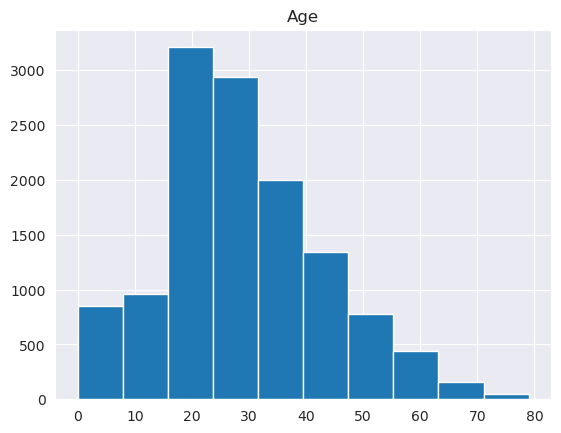

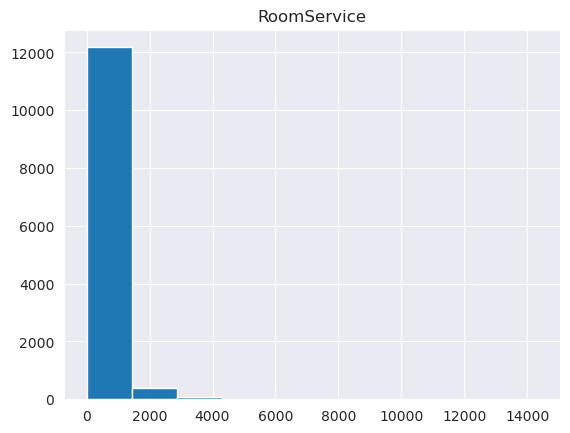

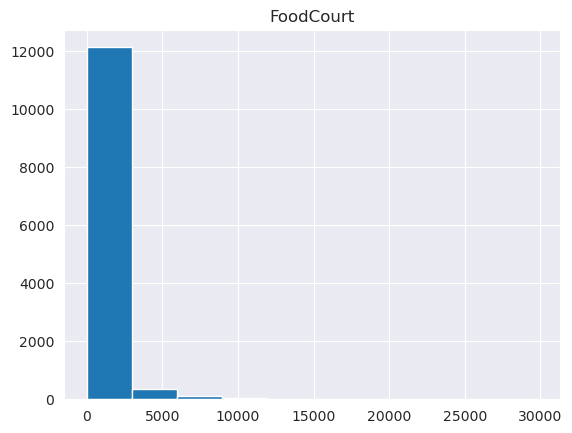

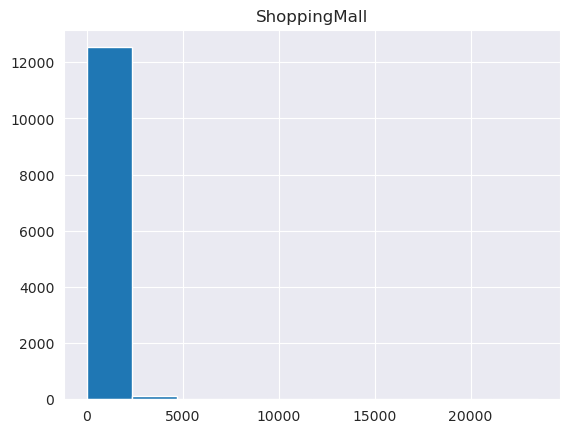

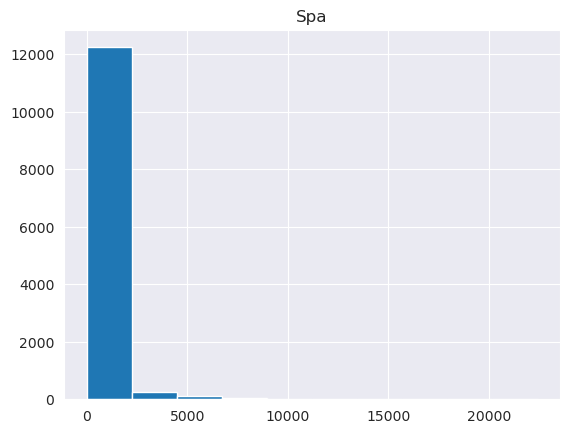

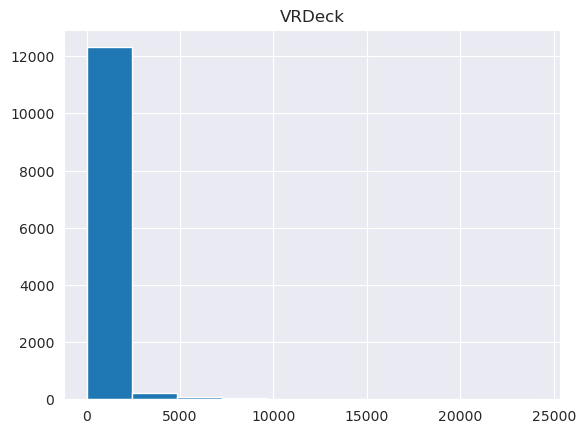

In [9]:
for column in df_numeric:
    plt.hist(df_numeric[column])
    plt.title(column)
    plt.show()

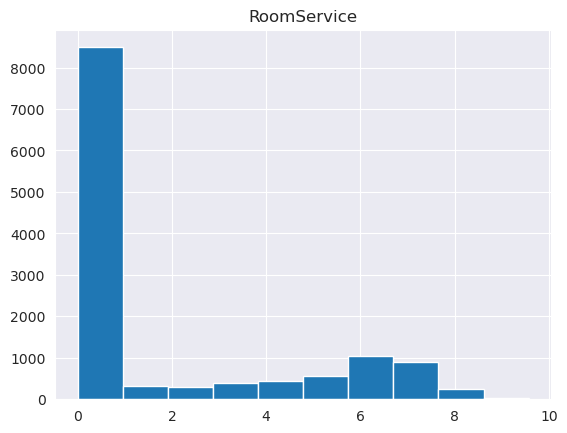

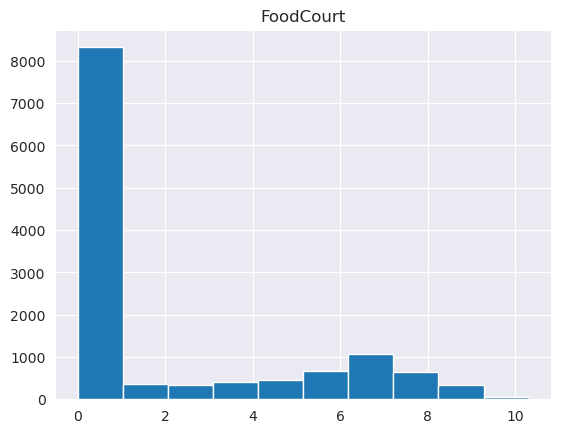

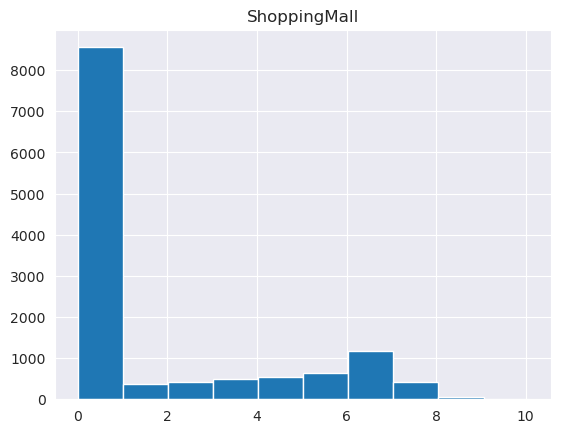

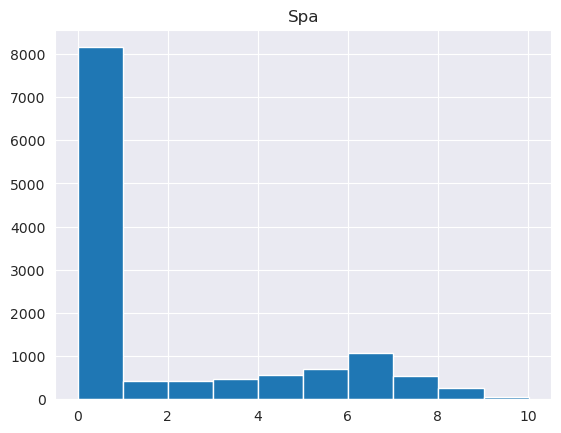

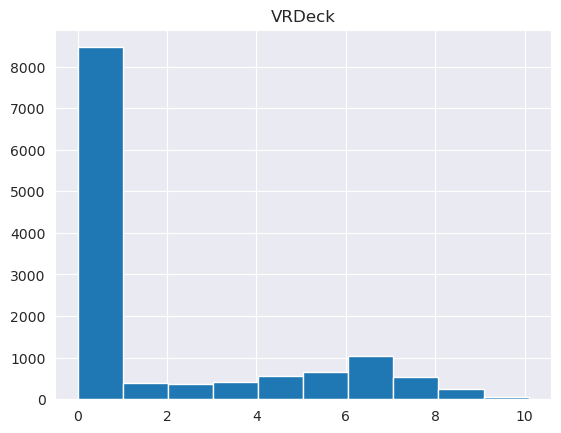

In [10]:
for column in df_numeric:
    if column != 'Age':
        df[column] = np.log(df[column] + 1)
        plt.hist(df[column])
        plt.title(column)
        plt.show()

                   Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000     0.067300   0.124447      0.034959  0.118992   
RoomService   0.067300     1.000000  -0.020146      0.057402  0.008936   
FoodCourt     0.124447    -0.020146   1.000000     -0.001589  0.228990   
ShoppingMall  0.034959     0.057402  -0.001589      1.000000  0.010504   
Spa           0.118992     0.008936   0.228990      0.010504  1.000000   
VRDeck        0.101441    -0.023847   0.244279      0.004485  0.149874   

                VRDeck  
Age           0.101441  
RoomService  -0.023847  
FoodCourt     0.244279  
ShoppingMall  0.004485  
Spa           0.149874  
VRDeck        1.000000  


<Axes: >

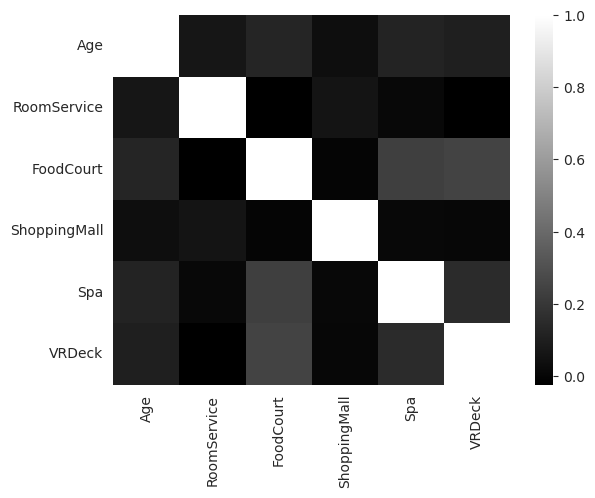

In [11]:
print(df_numeric.corr())
sns.heatmap(df_numeric.corr(), cmap='gray')

In [12]:
pd.pivot_table(df, index='Transported', values=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])

,Age,FoodCourt,RoomService,ShoppingMall,Spa,VRDeck
Transported,,,,,,
0.0,29.922858,2.351204,2.773948,2.107003,2.910377,2.752382
1.0,27.748834,1.548407,0.788634,1.174965,0.861818,0.853515


Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'Group',
       'In_group_id', 'Deck', 'DeckNumber', 'Side', 'Surname'],
      dtype='object')


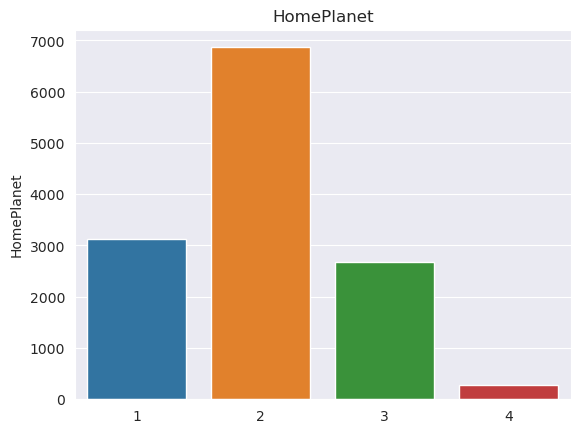

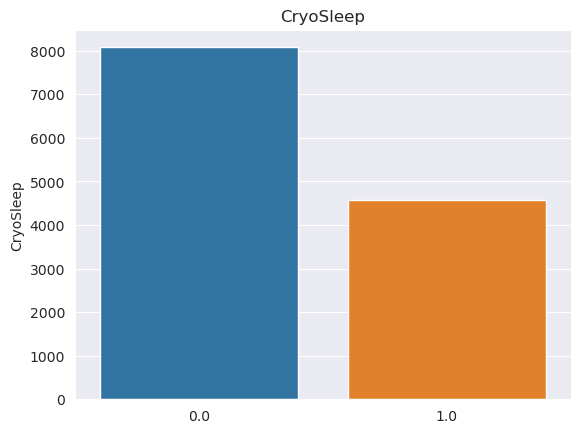

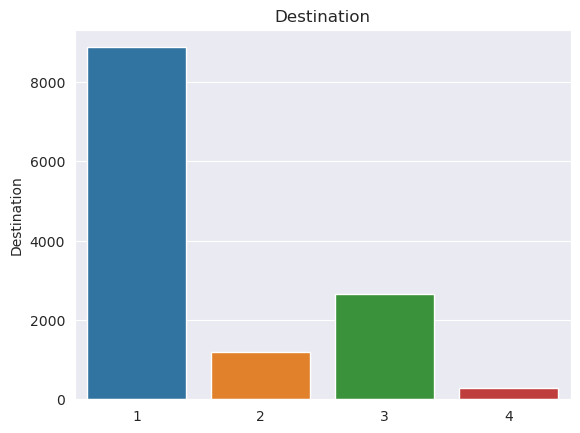

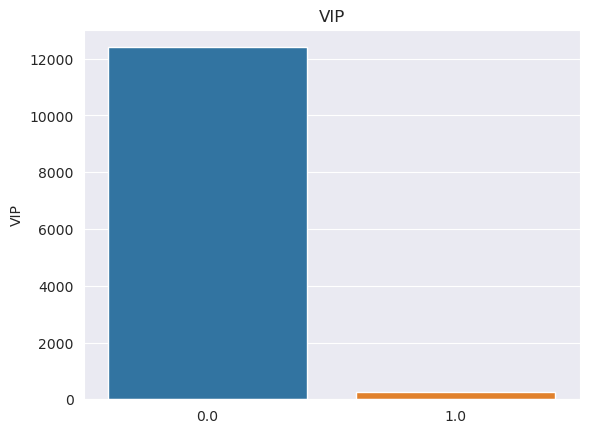

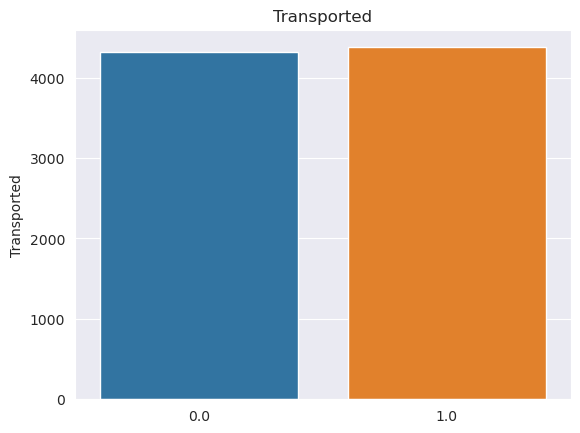

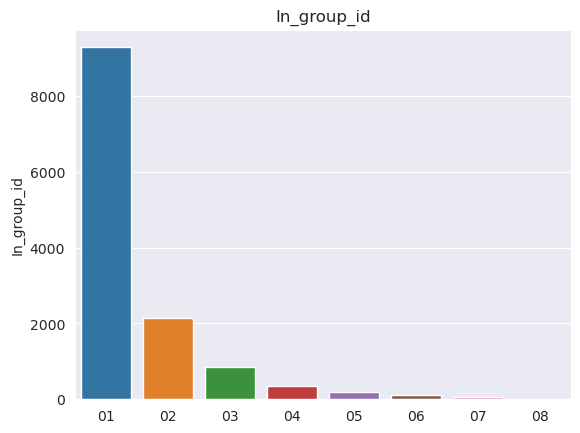

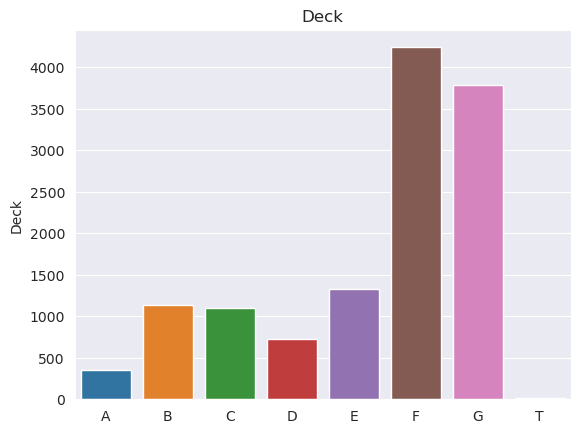

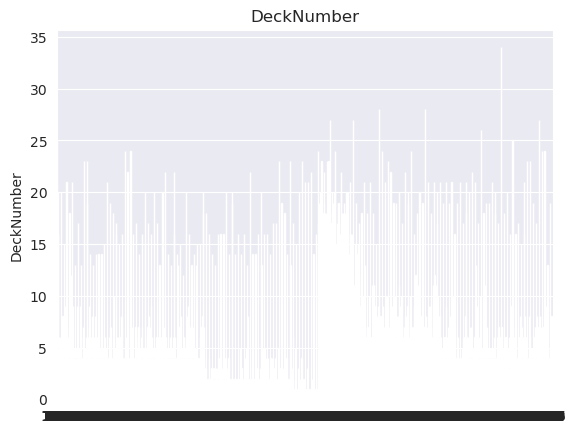

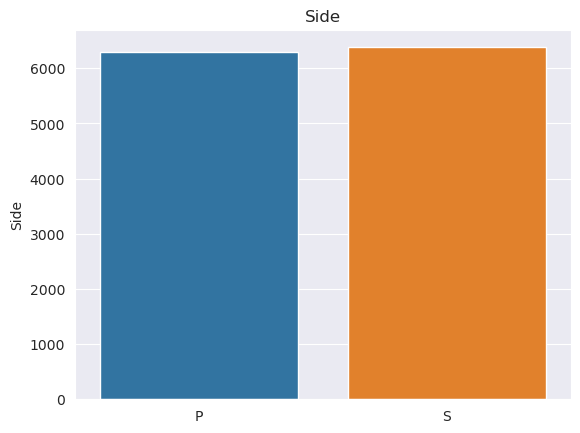

In [16]:
print(df_categories.columns)
for column in df_categories:
    if column != 'Group' and column != 'Surname' and column !='DeckNumber':
        value_counts = df_categories[column].value_counts().sort_index()
        sns.barplot(x=value_counts.index, y=value_counts)
        plt.title(column)
        plt.show()

In [17]:
print(df_categories.columns)
for column in df_categories.columns:
    if column != 'Transported':
        print(pd.pivot_table(df, index='Transported', columns=column, values='PassengerId', aggfunc='count'))
        print()

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'Group',
       'In_group_id', 'Deck', 'DeckNumber', 'Side', 'Surname'],
      dtype='object')
HomePlanet      1     2    3    4
Transported                      
0.0           727  2651  839   98
1.0          1404  1951  920  103

CryoSleep     0.0   1.0
Transported            
0.0          3650   554
1.0          1789  2483

Destination     1    2     3   4
Transported                     
0.0          3128  395   702  90
1.0          2787  401  1098  92

VIP           0.0  1.0
Transported           
0.0          4093  123
1.0          4198   76

Group        0001  0002  0003  0004  0005  0006  0007  0008  0009  0010  ...  \
Transported                                                              ...   
0.0           1.0   NaN   2.0   NaN   NaN   NaN   NaN   NaN   NaN   1.0  ...   
1.0           NaN   1.0   NaN   1.0   1.0   2.0   1.0   3.0   1.0   NaN  ...   

Group        9267  9268  9270  9272  9274  9275  9276

In [24]:
print(df.columns)
df.drop(columns=['Group', 'DeckNumber', 'Cabin', 'Name'], axis=1, inplace=True)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'train_test', 'In_group_id', 'Deck', 'Side', 'Surname'],
      dtype='object')


KeyError: "['Group', 'DeckNumber', 'Cabin', 'Name'] not found in axis"

In [26]:
df.drop(columns='Surname', inplace=True)

In [30]:
df['Deck'] = df['Deck'].apply(lambda x: array_to_int(df.Deck.unique(), x))
df['Side'] = df['Side'].apply(lambda x: array_to_int(df.Side.unique(), x))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12970 non-null  int64  
 2   CryoSleep     12660 non-null  float64
 3   Destination   12970 non-null  int64  
 4   Age           12700 non-null  float64
 5   VIP           12674 non-null  float64
 6   RoomService   12707 non-null  float64
 7   FoodCourt     12681 non-null  float64
 8   ShoppingMall  12664 non-null  float64
 9   Spa           12686 non-null  float64
 10  VRDeck        12702 non-null  float64
 11  Transported   8693 non-null   float64
 12  train_test    12970 non-null  int64  
 13  In_group_id   12970 non-null  object 
 14  Deck          12970 non-null  int64  
 15  Side          12970 non-null  int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 1.7+ MB


In [37]:
df.CryoSleep.fillna(df.CryoSleep.mode()[0], inplace=True)
df.Age.fillna(df.Age.mean(), inplace=True)
df.VIP.fillna(df.VIP.mode()[0], inplace=True)
df.RoomService.fillna(df.RoomService.mean(), inplace=True)
df.FoodCourt.fillna(df.FoodCourt.mean(), inplace=True)
df.ShoppingMall.fillna(df.ShoppingMall.mean(), inplace=True)
df.Spa.fillna(df.Spa.mean(), inplace=True)
df.VRDeck.fillna(df.VRDeck.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12970 non-null  int64  
 2   CryoSleep     12970 non-null  float64
 3   Destination   12970 non-null  int64  
 4   Age           12970 non-null  float64
 5   VIP           12970 non-null  float64
 6   RoomService   12970 non-null  float64
 7   FoodCourt     12970 non-null  float64
 8   ShoppingMall  12970 non-null  float64
 9   Spa           12970 non-null  float64
 10  VRDeck        12970 non-null  float64
 11  Transported   8693 non-null   float64
 12  train_test    12970 non-null  int64  
 13  In_group_id   12970 non-null  object 
 14  Deck          12970 non-null  int64  
 15  Side          12970 non-null  int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 1.7+ MB


In [38]:
X_train = df[df.train_test == 1].drop(['train_test'], axis=1)
X_test = df[df.train_test == 0].drop(['train_test'], axis=1)
y_train = df[df.train_test == 1].Transported

In [78]:
df_scaled = df.copy()
scaler = StandardScaler()
columns_to_scale = df_scaled.columns.difference(['train_test'])
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])
X_train_scaled = df_scaled[df_scaled['train_test'] == 1].drop(['train_test', 'Transported'], axis=1)
X_test_scaled = df_scaled[df_scaled['train_test'] == 0].drop(['train_test', 'Transported'], axis=1)
y_train_scaled = df[df_scaled['train_test'] == 1]['Transported']
X_train_scaled.dropna(inplace=True)

In [87]:
# Naive Bayes
bayes_clf = GaussianNB()
cross_val = cross_val_score(bayes_clf, X_train_scaled, y_train, cv=5)
print(cross_val.mean())

# Logistic Regression
lr_clf = LogisticRegression()
cross_val = cross_val_score(lr_clf, X_train_scaled, y_train, cv=5)
print(cross_val.mean())

# Tree
tree_clf = tree.DecisionTreeClassifier(max_depth=4)
cross_val = cross_val_score(tree_clf, X_train_scaled, y_train, cv=5)
print(cross_val.mean())

# SVM
svm_clf = SVC(C=1)
cross_val = cross_val_score(svm_clf, X_train_scaled, y_train, cv=5)
print(cross_val.mean())

# kNN
knn_clf = KNeighborsClassifier(n_neighbors=10)
cross_val = cross_val_score(knn_clf, X_train_scaled, y_train, cv=5)
print(cross_val.mean())

# Random Forest
forest_clf = RandomForestClassifier(n_estimators=9, n_jobs=-1)
cross_val = cross_val_score(forest_clf, X_train_scaled, y_train, cv=5)
print(cross_val.mean())

# Voting Classifier
voting_clf = VotingClassifier(estimators=[('forest_clf', forest_clf), ('svm_clf', svm_clf), ('bayes_clf', bayes_clf), ('knn_clf', knn_clf), ('tree_clf', tree_clf), ('lr_clf', lr_clf)], voting='hard')
cross_val = cross_val_score(voting_clf, X_train_scaled, y_train, cv=5)
print(cross_val.mean())

0.7469252397612214
0.7699323910743248
0.7277242254619039
0.7886840908925477
0.7672860677439186
0.757161139789742
0.7763759180672727


In [77]:
X_train_scaled

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,In_group_id,Deck,Side
0,-1.725497,-1.377702,-0.738967,-0.636171,0.718454,-0.146633,-0.656418,-0.666899,-0.643028,-0.681445,-0.650978,-1.007274,-0.490655,-1.332219,-0.991279
1,-1.725125,-0.013359,-0.738967,-0.636171,-0.335201,-0.146633,1.077868,0.122699,0.629139,1.613420,0.745007,0.992779,-0.490655,-0.855205,0.850946
2,-1.724753,-1.377702,-0.738967,-0.636171,2.053084,6.819762,0.739794,2.138954,-0.643028,2.523497,0.783645,-1.007274,-0.490655,-0.378191,0.850946
3,-1.724749,-1.377702,-0.738967,-0.636171,0.296992,-0.146633,-0.656418,1.787619,1.668084,2.268360,1.280859,-1.007274,0.468615,-0.378191,0.850946
4,-1.724381,-0.013359,-0.738967,-0.636171,-0.897150,-0.146633,1.452932,0.794852,1.318614,1.623849,-0.248093,0.992779,-0.490655,-0.855205,0.850946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.727849,-1.377702,-0.738967,1.628138,0.858942,6.819762,-0.656418,2.360252,-0.643028,2.011651,0.932338,-1.007274,-0.490655,-0.378191,-0.991279
8689,1.728593,-0.013359,1.353240,0.495983,-0.756662,-0.146633,-0.656418,-0.666899,-0.643028,-0.681445,-0.650978,-1.007274,-0.490655,0.098823,0.850946
8690,1.728966,-0.013359,-0.738967,-0.636171,-0.194713,-0.146633,-0.656418,-0.666899,2.299230,-0.429353,-0.650978,0.992779,-0.490655,0.098823,0.850946
8691,1.729338,-1.377702,-0.738967,1.628138,0.226749,-0.146633,-0.656418,1.718628,-0.643028,1.453170,2.312899,-1.007274,-0.490655,1.052852,0.850946


In [79]:
bayes_clf.fit(X_train_scaled, y_train)
lr_clf.fit(X_train_scaled, y_train)
knn_clf.fit(X_train_scaled, y_train)
tree_clf.fit(X_train_scaled, y_train)
forest_clf.fit(X_train_scaled, y_train)
svm_clf.fit(X_train_scaled, y_train)
voting_clf.fit(X_train_scaled, y_train)

bayes_predict = bayes_clf.predict(X_test_scaled)
lr_predict = lr_clf.predict(X_test_scaled)
knn_predict = knn_clf.predict(X_test_scaled)
tree_predict = tree_clf.predict(X_test_scaled)
forest_predict = forest_clf.predict(X_test_scaled)
svm_predict = svm_clf.predict(X_test_scaled)
voting_predict = voting_clf.predict(X_test_scaled)

In [85]:
final_data = {'PassengerId': test_df.PassengerId, 'Transported': bayes_predict}
submission_bayes = pd.DataFrame(data=final_data)

final_data = {'PassengerId': test_df.PassengerId, 'Transported': lr_predict}
submission_lr = pd.DataFrame(data=final_data)

final_data = {'PassengerId': test_df.PassengerId, 'Transported': knn_predict}
submission_knn = pd.DataFrame(data=final_data)

final_data = {'PassengerId': test_df.PassengerId, 'Transported': tree_predict}
submission_tree = pd.DataFrame(data=final_data)

final_data = {'PassengerId': test_df.PassengerId, 'Transported': forest_predict}
submission_forest = pd.DataFrame(data=final_data)

final_data = {'PassengerId': test_df.PassengerId, 'Transported': svm_predict}
submission_svm = pd.DataFrame(data=final_data)

final_data = {'PassengerId': test_df.PassengerId, 'Transported': voting_predict}
submission_voting = pd.DataFrame(data=final_data)

for submission in [submission_bayes, submission_lr, submission_knn, submission_tree, submission_forest, submission_svm, submission_voting]:
    submission.Transported = submission.Transported.astype(bool)

submission_bayes.to_csv('submission_bayes.csv', index=False)
submission_lr.to_csv('submission_lr.csv', index=False)
submission_knn.to_csv('submission_knn.csv', index=False)
submission_tree.to_csv('submission_tree.csv', index=False)
submission_forest.to_csv('submission_forest.csv', index=False)
submission_svm.to_csv('submission_svm.csv', index=False)
submission_voting.to_csv('submission_voting.csv', index=False)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
